# Volume by Price Dataset - Exploratory Data Analysis

This notebook performs exploratory data analysis on the 15-year volume by price dataset. We'll analyze price-volume relationships, identify patterns, and explore the data structure.

## Objectives:
- Understand the structure and quality of our volume by price data
- Identify patterns and trends in price-volume relationships
- Detect outliers and anomalies
- Prepare insights for feature engineering and model development

## 1. Import Required Libraries

In [1]:
# Essential libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from datetime import datetime, timedelta
import os
from IPython.display import display, HTML

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Set display options - show all columns for better dataframe inspection
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
Pandas version: 2.3.2
NumPy version: 2.3.3


## 2. Load and Inspect Dataset

In [2]:
# Load the volume by price dataset
data_path = r"../data/raw/dataframes/volume_by_price_15years.csv"

print("Loading dataset...")
print(f"File path: {data_path}")
print(f"File exists: {os.path.exists(data_path)}")

try:
    # Load the dataset with appropriate parameters for large files
    df = pd.read_csv(data_path, low_memory=False)
    print(f"✅ Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    df = None

Loading dataset...
File path: ../data/raw/dataframes/volume_by_price_15years.csv
File exists: True
✅ Dataset loaded successfully!
Dataset shape: (4321606, 19)
Memory usage: 873.74 MB
✅ Dataset loaded successfully!
Dataset shape: (4321606, 19)
Memory usage: 873.74 MB


## 2.1 Clean the dataset

1. Removing TodayOpen, TodayHigh, TodayLow from the dataset.
2. Drop all rows before 2011-01-01

In [3]:
# Drop TodayOpen, TodayHigh, TodayLow columns from the dataset
if df is not None:
    columns_to_drop = ['TodayOpen', 'TodayHigh', 'TodayLow']
    
    # Check which columns actually exist in the dataset
    existing_columns = [col for col in columns_to_drop if col in df.columns]
    missing_columns = [col for col in columns_to_drop if col not in df.columns]
    
    print("=== DROPPING UNWANTED COLUMNS ===")
    print(f"Columns to drop: {columns_to_drop}")
    print(f"Existing columns: {existing_columns}")
    
    if missing_columns:
        print(f"⚠️  Missing columns (not in dataset): {missing_columns}")
    
    if existing_columns:
        # Store original shape
        original_shape = df.shape
        
        # Drop the existing columns
        df = df.drop(columns=existing_columns)
        
        print(f"✅ Successfully dropped {len(existing_columns)} columns")
        print(f"Dataset shape changed from {original_shape} to {df.shape}")
        print(f"Remaining columns: {list(df.columns)}")
    else:
        print("❌ No columns to drop - none of the specified columns exist in the dataset")
    
    print(f"\nFinal dataset shape: {df.shape}")

=== DROPPING UNWANTED COLUMNS ===
Columns to drop: ['TodayOpen', 'TodayHigh', 'TodayLow']
Existing columns: ['TodayOpen', 'TodayHigh', 'TodayLow']
✅ Successfully dropped 3 columns
Dataset shape changed from (4321606, 19) to (4321606, 16)
Remaining columns: ['DateTime', 'Open', 'High', 'Low', 'Close', 'Volume', 'RVOL', 'LTMaxVol', 'LTTotalVol', 'LTBidVol', 'LTAskVol', 'Price', 'BidVol', 'AskVol', 'TotalVolume', 'NumOfTrades']

Final dataset shape: (4321606, 16)
✅ Successfully dropped 3 columns
Dataset shape changed from (4321606, 19) to (4321606, 16)
Remaining columns: ['DateTime', 'Open', 'High', 'Low', 'Close', 'Volume', 'RVOL', 'LTMaxVol', 'LTTotalVol', 'LTBidVol', 'LTAskVol', 'Price', 'BidVol', 'AskVol', 'TotalVolume', 'NumOfTrades']

Final dataset shape: (4321606, 16)


In [4]:
# Filter dataset to keep only rows from 2011-01-01 onwards
if df is not None:
    print("\n=== FILTERING DATA BY DATE ===")
    
    # Try to identify date/time columns
    date_columns = []
    for col in df.columns:
        if any(keyword in col.lower() for keyword in ['date', 'time', 'timestamp', 'datetime']):
            date_columns.append(col)
    
    print(f"Potential date columns found: {date_columns}")
    
    if date_columns:
        # Try each date column to find one that can be converted to datetime
        date_col_used = None
        for col in date_columns:
            try:
                # Test conversion on a sample
                sample_values = df[col].dropna().head(10)
                pd.to_datetime(sample_values)
                date_col_used = col
                print(f"Using column '{col}' for date filtering")
                break
            except:
                print(f"Column '{col}' cannot be converted to datetime, trying next...")
                continue
        
        if date_col_used:
            # Store original shape
            original_shape = df.shape
            
            # Convert the date column to datetime
            df[date_col_used] = pd.to_datetime(df[date_col_used])
            
            # Define the cutoff date
            cutoff_date = pd.Timestamp('2011-01-01')
            
            # Show date range before filtering
            print(f"Original date range: {df[date_col_used].min()} to {df[date_col_used].max()}")
            
            # Filter the data
            df = df[df[date_col_used] >= cutoff_date]
            
            print(f"✅ Successfully filtered data from {cutoff_date.date()} onwards")
            print(f"Dataset shape changed from {original_shape} to {df.shape}")
            print(f"New date range: {df[date_col_used].min()} to {df[date_col_used].max()}")
            print(f"Rows removed: {original_shape[0] - df.shape[0]:,}")
            
            # Reset index after filtering
            df = df.reset_index(drop=True)
            print("Index reset after filtering")
            
        else:
            print("❌ No valid date column found for filtering")
            print("Available columns:", list(df.columns))
            print("Please manually specify the date column name if it exists")
    
    else:
        print("❌ No date columns detected in the dataset")
        print("Available columns:", list(df.columns))
        print("If a date column exists with a different naming pattern, please specify it manually")
    
    print(f"\nFinal dataset shape after all cleaning: {df.shape}")


=== FILTERING DATA BY DATE ===
Potential date columns found: ['DateTime']
Using column 'DateTime' for date filtering
Using column 'DateTime' for date filtering
Original date range: 2008-05-04 17:00:00 to 2025-09-23 20:30:00
Original date range: 2008-05-04 17:00:00 to 2025-09-23 20:30:00
✅ Successfully filtered data from 2011-01-01 onwards
Dataset shape changed from (4321606, 16) to (3896722, 16)
New date range: 2011-01-02 17:00:00 to 2025-09-23 20:30:00
Rows removed: 424,884
Index reset after filtering

Final dataset shape after all cleaning: (3896722, 16)
✅ Successfully filtered data from 2011-01-01 onwards
Dataset shape changed from (4321606, 16) to (3896722, 16)
New date range: 2011-01-02 17:00:00 to 2025-09-23 20:30:00
Rows removed: 424,884
Index reset after filtering

Final dataset shape after all cleaning: (3896722, 16)


In [5]:
# Display first few rows to understand structure using HTML formatting
if df is not None:
    print("=== FIRST 5 ROWS ===")
    html = df.head(5).to_html(max_cols=None)
    display(HTML(f'<div style="overflow-x:auto">{html}</div>'))
    
    print("\n=== LAST 5 ROWS ===")
    html = df.tail(5).to_html(max_cols=None)
    display(HTML(f'<div style="overflow-x:auto">{html}</div>'))
    
    print("\n=== SAMPLE OF MIDDLE ROWS ===")
    sample_idx = len(df) // 2
    html = df.iloc[sample_idx:sample_idx+5].to_html(max_cols=None)
    display(HTML(f'<div style="overflow-x:auto">{html}</div>'))

=== FIRST 5 ROWS ===


,DateTime,Open,High,Low,Close,Volume,RVOL,LTMaxVol,LTTotalVol,LTBidVol,LTAskVol,Price,BidVol,AskVol,TotalVolume,NumOfTrades
0,2011-01-02 17:00:00,1687.5,1689.25,1686.75,1687.75,5677.0,255.77,0.0,0.0,0.0,0.0,1686.75,7.0,0.0,7.0,5.0
1,2011-01-02 17:00:00,1687.5,1689.25,1686.75,1687.75,5677.0,255.77,0.0,0.0,0.0,0.0,1687.00,12.0,5.0,17.0,10.0
2,2011-01-02 17:00:00,1687.5,1689.25,1686.75,1687.75,5677.0,255.77,0.0,0.0,0.0,0.0,1687.25,288.0,15.0,303.0,104.0
3,2011-01-02 17:00:00,1687.5,1689.25,1686.75,1687.75,5677.0,255.77,0.0,0.0,0.0,0.0,1687.50,803.0,565.0,1075.0,298.0
4,2011-01-02 17:00:00,1687.5,1689.25,1686.75,1687.75,5677.0,255.77,0.0,0.0,0.0,0.0,1687.75,618.0,470.0,1088.0,274.0



=== LAST 5 ROWS ===


,DateTime,Open,High,Low,Close,Volume,RVOL,LTMaxVol,LTTotalVol,LTBidVol,LTAskVol,Price,BidVol,AskVol,TotalVolume,NumOfTrades
3896717,2025-09-23 20:30:00,6715.75,6716.75,6714.75,6715.5,873.0,33.54,0.0,0.0,0.0,0.0,6715.75,30.0,31.0,61.0,59.0
3896718,2025-09-23 20:30:00,6715.75,6716.75,6714.75,6715.5,873.0,33.54,0.0,0.0,0.0,0.0,6716.00,52.0,57.0,109.0,94.0
3896719,2025-09-23 20:30:00,6715.75,6716.75,6714.75,6715.5,873.0,33.54,0.0,0.0,0.0,0.0,6716.25,52.0,69.0,121.0,105.0
3896720,2025-09-23 20:30:00,6715.75,6716.75,6714.75,6715.5,873.0,33.54,0.0,0.0,0.0,0.0,6716.50,18.0,19.0,37.0,32.0
3896721,2025-09-23 20:30:00,6715.75,6716.75,6714.75,6715.5,873.0,33.54,0.0,0.0,0.0,0.0,6716.75,0.0,2.0,2.0,2.0



=== SAMPLE OF MIDDLE ROWS ===


,DateTime,Open,High,Low,Close,Volume,RVOL,LTMaxVol,LTTotalVol,LTBidVol,LTAskVol,Price,BidVol,AskVol,TotalVolume,NumOfTrades
1948361,2021-01-15 14:30:00,4379.25,4380.75,4368.00,4371.00,189815.0,137.02,212.0,1694.0,1098.0,596.0,4380.50,200.0,214.0,414.0,221.0
1948362,2021-01-15 14:30:00,4379.25,4380.75,4368.00,4371.00,189815.0,137.02,212.0,1694.0,1098.0,596.0,4380.75,10.0,131.0,141.0,79.0
1948363,2021-01-15 15:00:00,4371.00,4371.25,4357.75,4359.75,61498.0,161.64,149.0,401.0,0.0,401.0,4357.75,5.0,0.0,5.0,2.0
1948364,2021-01-15 15:00:00,4371.00,4371.25,4357.75,4359.75,61498.0,161.64,149.0,401.0,0.0,401.0,4358.00,90.0,16.0,106.0,57.0
1948365,2021-01-15 15:00:00,4371.00,4371.25,4357.75,4359.75,61498.0,161.64,149.0,401.0,0.0,401.0,4358.25,190.0,202.0,392.0,156.0


## 3. Dataset Overview and Information

In [6]:
# Dataset information and structure
if df is not None:
    print("=== DATASET INFORMATION ===")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"Index: {df.index}")
    
    print("\n=== DATA TYPES ===")
    print(df.dtypes)
    
    print("\n=== DETAILED INFO ===")
    df.info(memory_usage='deep')
    
    print("\n=== COLUMN STATISTICS ===")
    print(f"Numerical columns: {df.select_dtypes(include=[np.number]).columns.tolist()}")
    print(f"Object columns: {df.select_dtypes(include=['object']).columns.tolist()}")
    print(f"DateTime columns: {df.select_dtypes(include=['datetime64']).columns.tolist()}")

=== DATASET INFORMATION ===
Shape: (3896722, 16)
Columns: ['DateTime', 'Open', 'High', 'Low', 'Close', 'Volume', 'RVOL', 'LTMaxVol', 'LTTotalVol', 'LTBidVol', 'LTAskVol', 'Price', 'BidVol', 'AskVol', 'TotalVolume', 'NumOfTrades']
Index: RangeIndex(start=0, stop=3896722, step=1)

=== DATA TYPES ===
DateTime       datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close                 float64
Volume                float64
RVOL                  float64
LTMaxVol              float64
LTTotalVol            float64
LTBidVol              float64
LTAskVol              float64
Price                 float64
BidVol                float64
AskVol                float64
TotalVolume           float64
NumOfTrades           float64
dtype: object

=== DETAILED INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3896722 entries, 0 to 3896721
Data columns (total 16 columns):
 #   Column       Dtype         
---  ------       -----         
 0   

## 4. Handle Missing Values

In [7]:
# Analyze missing values
if df is not None:
    print("=== MISSING VALUES ANALYSIS ===")
    missing_values = df.isnull().sum()
    missing_percent = (df.isnull().sum() / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': missing_values.values,
        'Missing_Percentage': missing_percent.values
    })
    missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
    
    if len(missing_df) > 0:
        print("Columns with missing values:")
        html = missing_df.to_html(max_cols=None)
        display(HTML(f'<div style="overflow-x:auto">{html}</div>'))
        
        # Visualize missing values pattern
        if len(missing_df) > 0:
            plt.figure(figsize=(12, 6))
            sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
            plt.title('Missing Values Heatmap')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
    else:
        print("✅ No missing values found in the dataset!")
        
    print(f"\nTotal missing values: {df.isnull().sum().sum()}")
    print(f"Percentage of complete rows: {(1 - df.isnull().any(axis=1).sum() / len(df)) * 100:.2f}%")

=== MISSING VALUES ANALYSIS ===
✅ No missing values found in the dataset!

Total missing values: 0
Percentage of complete rows: 100.00%
✅ No missing values found in the dataset!

Total missing values: 0
Percentage of complete rows: 100.00%


## 5. Descriptive Statistics

In [8]:
# Generate descriptive statistics
if df is not None:
    print("=== NUMERICAL VARIABLES SUMMARY ===")
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    
    if len(numerical_cols) > 0:
        # Basic statistics
        stats_summary = df[numerical_cols].describe()
        html = stats_summary.to_html(max_cols=None)
        display(HTML(f'<div style="overflow-x:auto">{html}</div>'))
        
        # Additional statistics
        print("\n=== ADDITIONAL STATISTICS ===")
        additional_stats = pd.DataFrame({
            'Skewness': df[numerical_cols].skew(),
            'Kurtosis': df[numerical_cols].kurtosis(),
            'Variance': df[numerical_cols].var(),
            'Std_Dev': df[numerical_cols].std(),
            'Range': df[numerical_cols].max() - df[numerical_cols].min()
        })
        html = additional_stats.to_html(max_cols=None)
        display(HTML(f'<div style="overflow-x:auto">{html}</div>'))
        
        # Quartile analysis
        print("\n=== QUARTILE ANALYSIS ===")
        quartiles = df[numerical_cols].quantile([0.25, 0.5, 0.75, 0.95, 0.99])
        html = quartiles.to_html(max_cols=None)
        display(HTML(f'<div style="overflow-x:auto">{html}</div>'))
    
    # Categorical variables summary
    categorical_cols = df.select_dtypes(include=['object']).columns
    if len(categorical_cols) > 0:
        print(f"\n=== CATEGORICAL VARIABLES SUMMARY ===")
        for col in categorical_cols[:5]:  # Show first 5 categorical columns
            print(f"\n--- {col} ---")
            print(f"Unique values: {df[col].nunique()}")
            print(f"Most frequent values:")
            value_counts = df[col].value_counts().head()
            html = value_counts.to_frame().to_html(max_cols=None)
            display(HTML(f'<div style="overflow-x:auto">{html}</div>'))

=== NUMERICAL VARIABLES SUMMARY ===


,Open,High,Low,Close,Volume,RVOL,LTMaxVol,LTTotalVol,LTBidVol,LTAskVol,Price,BidVol,AskVol,TotalVolume,NumOfTrades
count,3.896722e+06,3.896722e+06,3.896722e+06,3.896722e+06,3.896722e+06,3.896722e+06,3.896722e+06,3.896722e+06,3.896722e+06,3.896722e+06,3.896722e+06,3.896722e+06,3.896722e+06,3.896722e+06,3.896722e+06
mean,4.067180e+03,4.073376e+03,4.060624e+03,4.067040e+03,6.437725e+04,1.334440e+02,1.222818e+02,7.803497e+02,4.009103e+02,3.794394e+02,4.066981e+03,7.657847e+02,7.642714e+02,1.530064e+03,6.725074e+02
std,1.329328e+03,1.331204e+03,1.327337e+03,1.329225e+03,7.596455e+04,1.433493e+02,1.993325e+02,2.292764e+03,1.238955e+03,1.158065e+03,1.329254e+03,1.352912e+03,1.344271e+03,2.639870e+03,8.504299e+02
min,1.519750e+03,1.522500e+03,1.515500e+03,1.519500e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.515500e+03,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,3.020750e+03,3.028500e+03,3.009500e+03,3.020562e+03,7.712000e+03,7.704000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.020500e+03,8.800000e+01,8.900000e+01,1.900000e+02,1.240000e+02
50%,4.300250e+03,4.308000e+03,4.293750e+03,4.301000e+03,3.262300e+04,1.045400e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.300250e+03,2.780000e+02,2.790000e+02,5.680000e+02,3.310000e+02
75%,5.059500e+03,5.066500e+03,5.050750e+03,5.059250e+03,9.944300e+04,1.471500e+02,1.910000e+02,5.340000e+02,2.450000e+02,2.370000e+02,5.058750e+03,8.600000e+02,8.610000e+02,1.728000e+03,9.010000e+02
max,6.755500e+03,6.756750e+03,6.751750e+03,6.755750e+03,7.128580e+05,1.480000e+04,4.270000e+03,6.156100e+04,3.409700e+04,3.295600e+04,6.756750e+03,1.017470e+05,6.853400e+04,1.092160e+05,1.406300e+04



=== ADDITIONAL STATISTICS ===


,Skewness,Kurtosis,Variance,Std_Dev,Range
Open,-0.090603,-1.045549,1.767114e+06,1329.328487,5235.75
High,-0.092337,-1.046791,1.772104e+06,1331.204074,5234.25
Low,-0.088836,-1.044727,1.761823e+06,1327.336651,5236.25
Close,-0.090644,-1.045639,1.766840e+06,1329.225324,5236.25
Volume,1.836942,4.593955,5.770613e+09,75964.553721,712857.00
RVOL,15.189194,523.844193,2.054902e+04,143.349291,14800.00
LTMaxVol,4.429629,41.220471,3.973345e+04,199.332511,4270.00
LTTotalVol,7.755223,98.546242,5.256767e+06,2292.764117,61561.00
LTBidVol,7.791334,97.919516,1.535009e+06,1238.954654,34097.00
LTAskVol,8.108014,108.911448,1.341115e+06,1158.065403,32956.00



=== QUARTILE ANALYSIS ===


,Open,High,Low,Close,Volume,RVOL,LTMaxVol,LTTotalVol,LTBidVol,LTAskVol,Price,BidVol,AskVol,TotalVolume,NumOfTrades
0.25,3020.75,3028.50,3009.50,3020.5625,7712.0,77.04,0.0,0.0,0.0,0.0,3020.50,88.0,89.0,190.0,124.0
0.50,4300.25,4308.00,4293.75,4301.0000,32623.0,104.54,0.0,0.0,0.0,0.0,4300.25,278.0,279.0,568.0,331.0
0.75,5059.50,5066.50,5050.75,5059.2500,99443.0,147.15,191.0,534.0,245.0,237.0,5058.75,860.0,861.0,1728.0,901.0
0.95,6133.50,6142.75,6124.25,6133.2500,215046.0,296.25,466.0,3913.0,2068.0,1976.0,6133.50,3135.0,3121.0,6213.0,2441.0
0.99,6474.00,6482.25,6469.00,6474.5000,324145.0,605.79,861.0,10685.0,5767.0,5310.0,6474.75,6700.0,6658.0,13141.0,3914.0


## 6. Data Visualization

=== DISTRIBUTION PLOTS ===


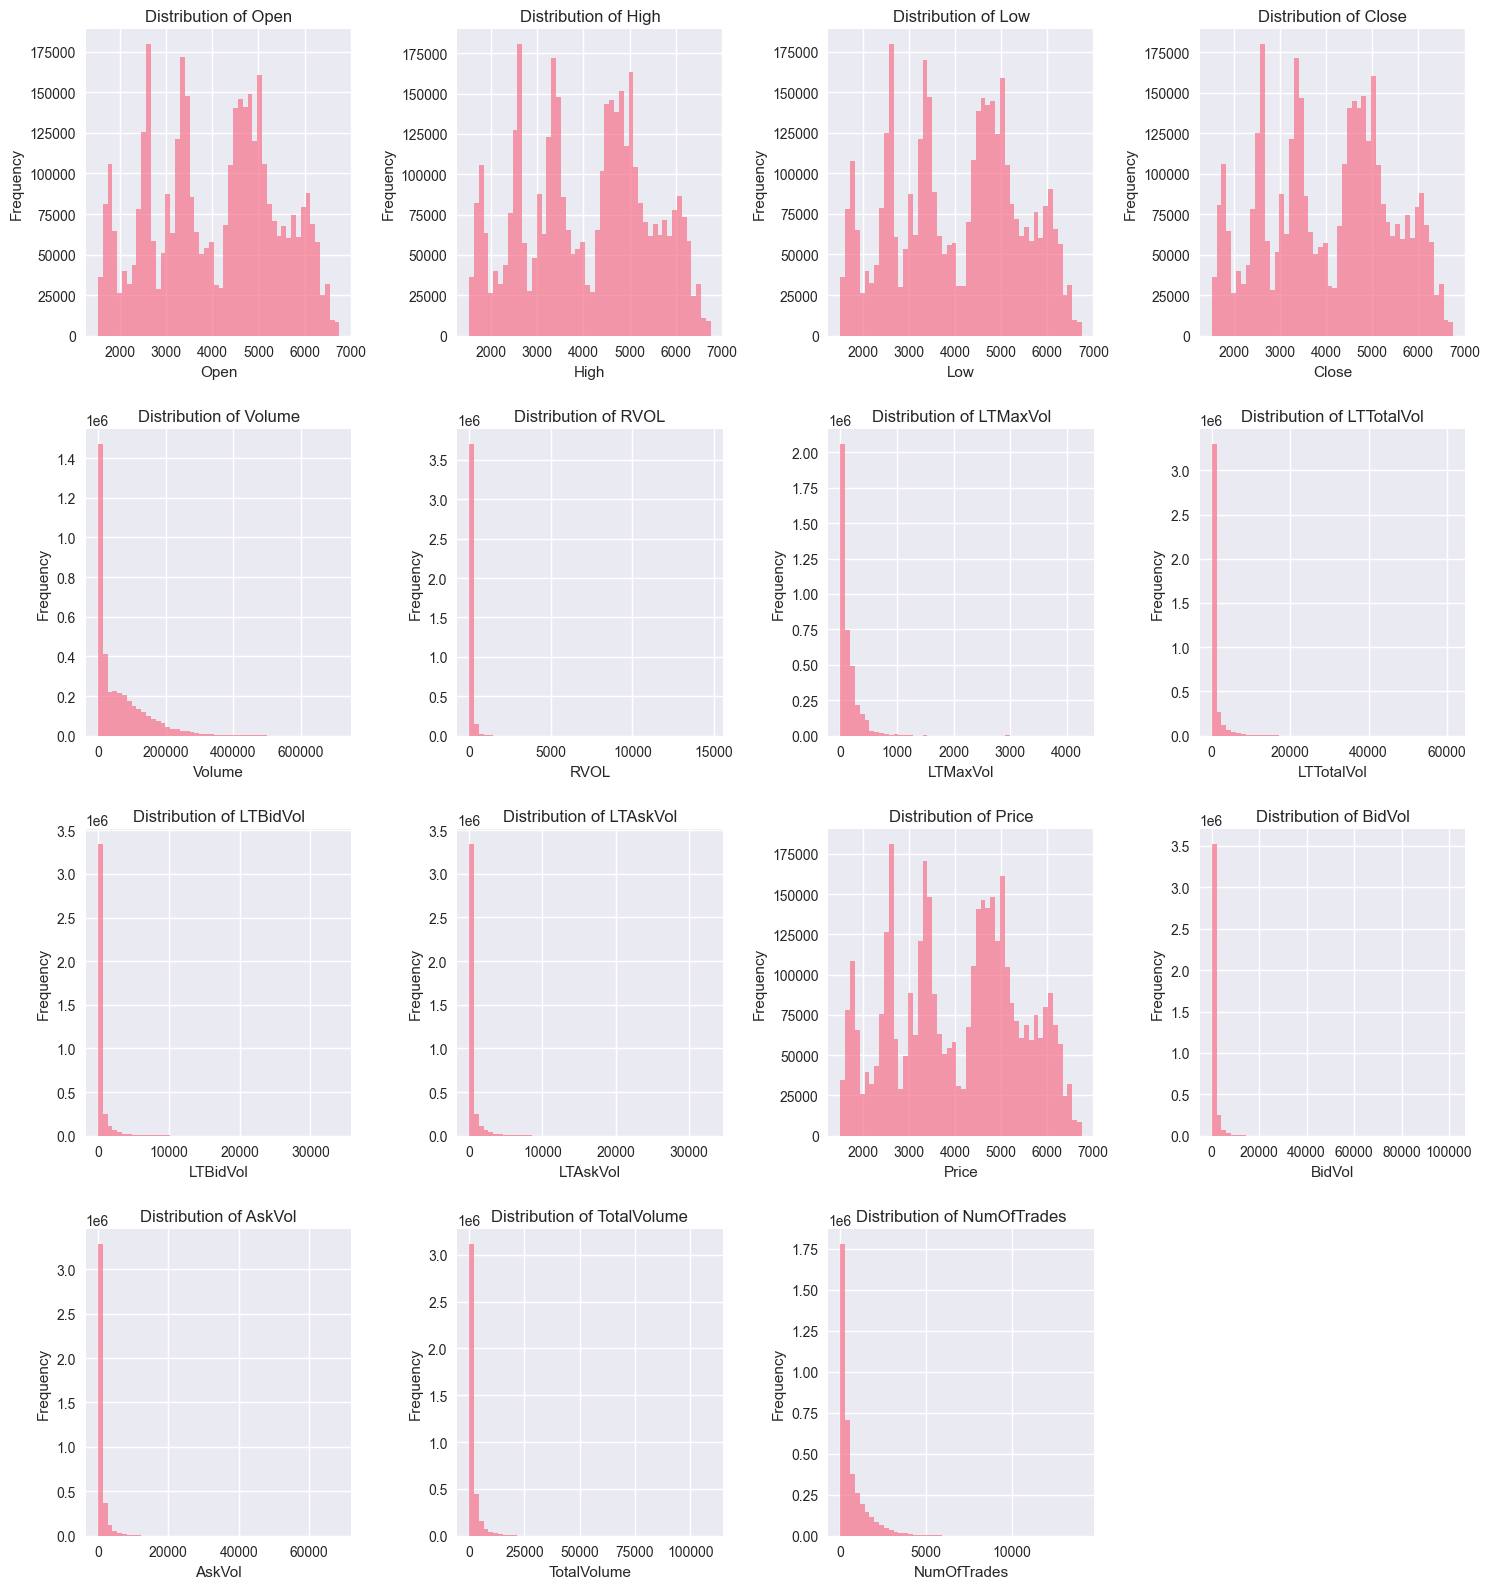


=== BOX PLOTS FOR OUTLIER DETECTION ===


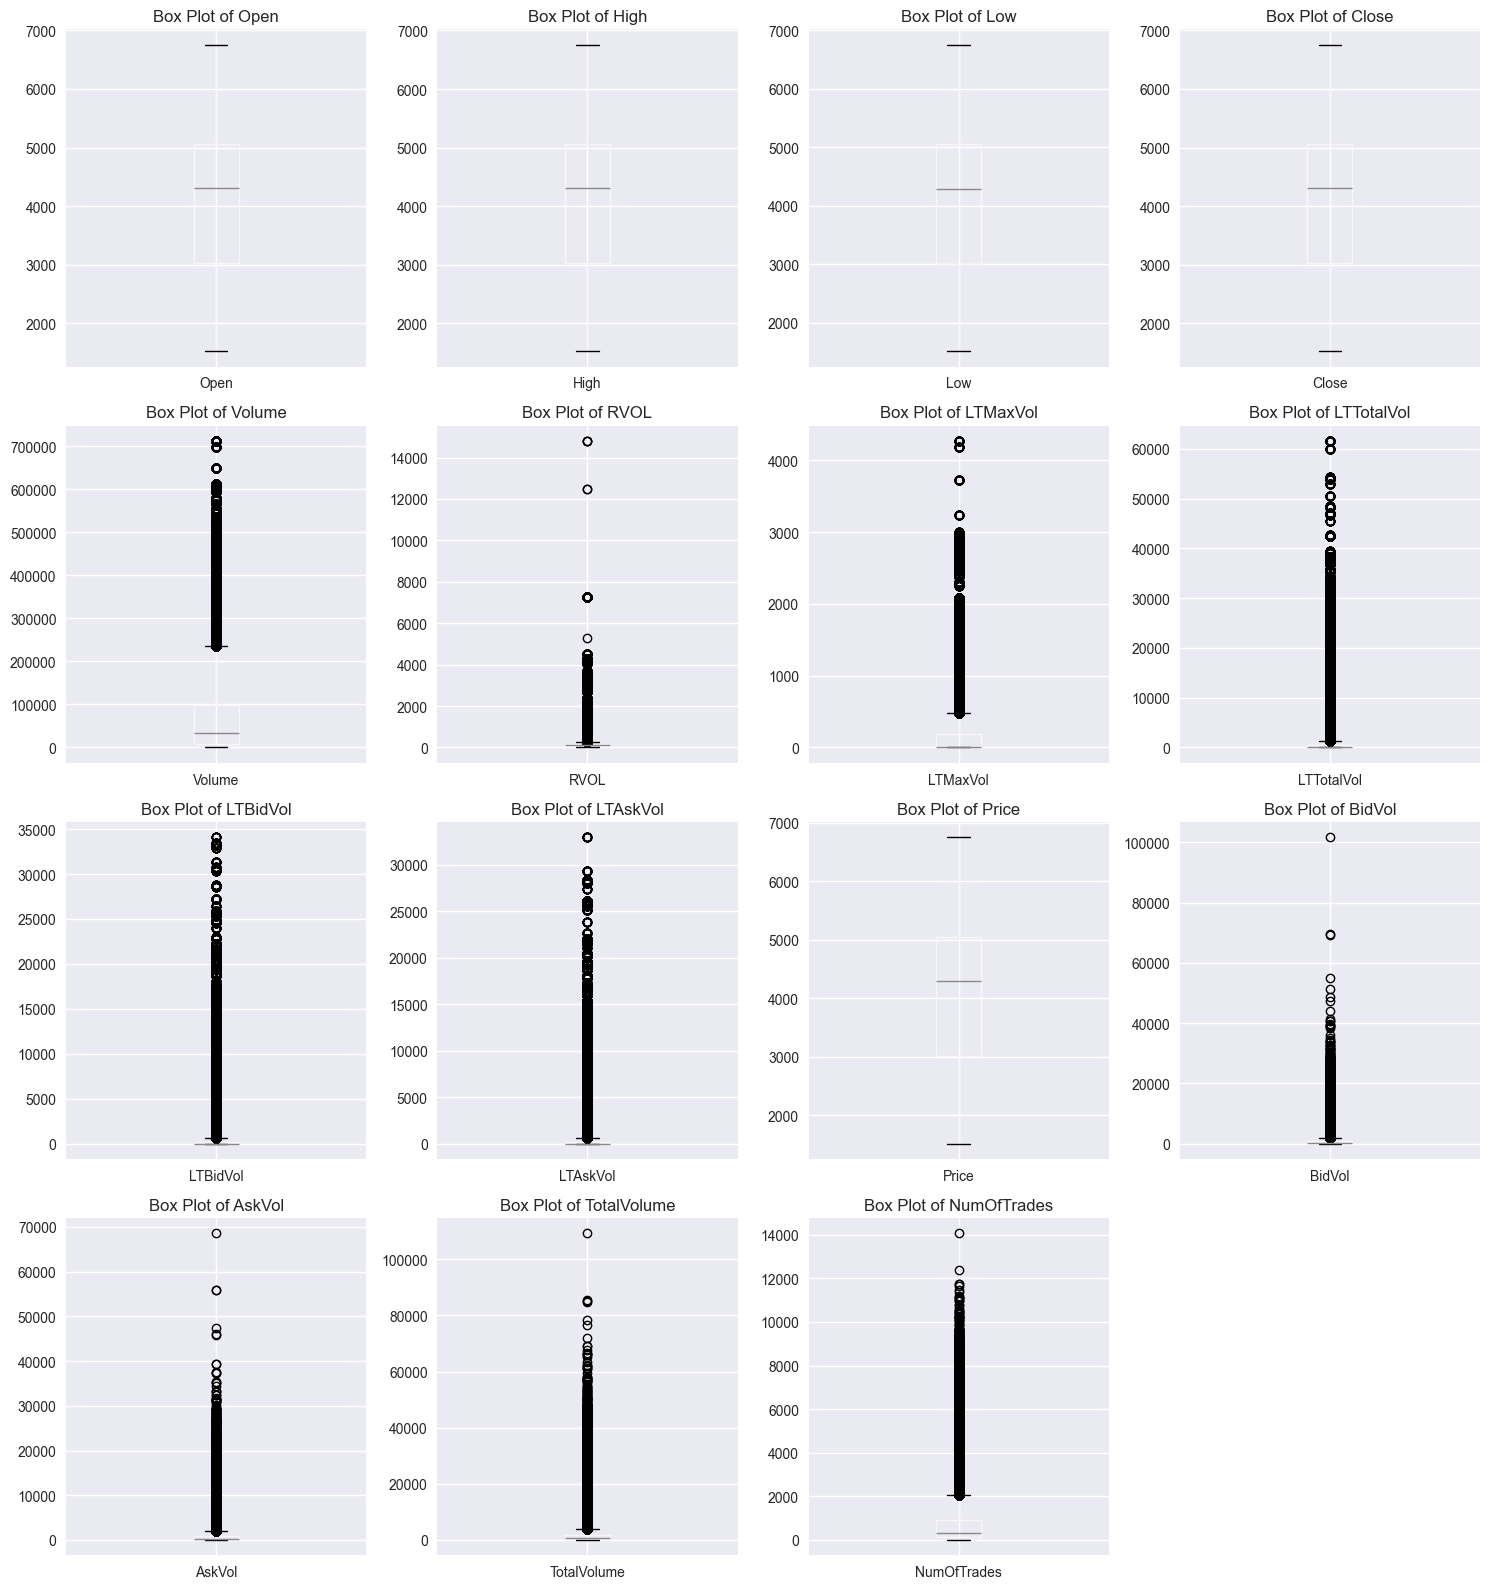

In [9]:
# Create comprehensive visualizations
if df is not None:
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    
    if len(numerical_cols) > 0:
        # Histograms for numerical variables
        print("=== DISTRIBUTION PLOTS ===")
        n_cols = min(4, len(numerical_cols))
        n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
        if n_rows * n_cols == 1:
            axes = [axes]
        elif n_rows == 1:
            axes = axes
        else:
            axes = axes.flatten()
        
        for i, col in enumerate(numerical_cols):
            if i < len(axes):
                df[col].hist(bins=50, ax=axes[i], alpha=0.7)
                axes[i].set_title(f'Distribution of {col}')
                axes[i].set_xlabel(col)
                axes[i].set_ylabel('Frequency')
        
        # Hide empty subplots
        for i in range(len(numerical_cols), len(axes)):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()
        
        # Box plots for outlier detection
        print("\n=== BOX PLOTS FOR OUTLIER DETECTION ===")
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
        if n_rows * n_cols == 1:
            axes = [axes]
        elif n_rows == 1:
            axes = axes
        else:
            axes = axes.flatten()
        
        for i, col in enumerate(numerical_cols):
            if i < len(axes):
                df.boxplot(column=col, ax=axes[i])
                axes[i].set_title(f'Box Plot of {col}')
        
        # Hide empty subplots
        for i in range(len(numerical_cols), len(axes)):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()

In [10]:
# Interactive visualizations with Plotly (with fallback for rendering issues)
if df is not None and len(numerical_cols) > 0:
    print("=== INTERACTIVE VISUALIZATIONS ===")
    
    # Sample data for performance if dataset is very large
    sample_size = min(10000, len(df))
    df_sample = df.sample(n=sample_size) if len(df) > sample_size else df
    
    try:
        # Try to configure Plotly renderer
        import plotly.io as pio
        
        # Try different renderers in order of preference
        renderers_to_try = ["plotly_mimetype", "notebook", "colab", "png"]
        renderer_set = False
        
        for renderer in renderers_to_try:
            if renderer in pio.renderers:
                try:
                    pio.renderers.default = renderer
                    print(f"✅ Using '{renderer}' renderer")
                    renderer_set = True
                    break
                except:
                    continue
        
        if not renderer_set:
            pio.renderers.default = "png"
            print("⚠️ Using 'png' renderer (static images)")
        
        # Interactive histograms
        print("\\n--- Creating Distribution Plots ---")
        for i, col in enumerate(numerical_cols[:4]):  # Show first 4 numerical columns
            try:
                fig = px.histogram(df_sample, x=col, nbins=50, 
                                  title=f'Interactive Distribution of {col}',
                                  marginal="box")
                
                # Try to show the figure
                try:
                    fig.show()
                    print(f"✅ Created interactive plot for {col}")
                except Exception as show_error:
                    print(f"⚠️ Interactive display failed for {col}, trying static display")
                    # Fallback to saving as image or using matplotlib
                    import matplotlib.pyplot as plt
                    
                    plt.figure(figsize=(10, 6))
                    plt.hist(df_sample[col].dropna(), bins=50, alpha=0.7, edgecolor='black')
                    plt.title(f'Distribution of {col}')
                    plt.xlabel(col)
                    plt.ylabel('Frequency')
                    plt.grid(True, alpha=0.3)
                    plt.show()
                    print(f"✅ Created static plot for {col}")
                    
            except Exception as e:
                print(f"❌ Failed to create plot for {col}: {e}")
        
        # Scatter plot matrix for numerical variables (first 4 columns)
        if len(numerical_cols) >= 2:
            print("\\n--- Creating Scatter Plot Matrix ---")
            try:
                cols_for_scatter = numerical_cols[:4].tolist()
                fig = px.scatter_matrix(df_sample[cols_for_scatter], 
                                       title="Scatter Plot Matrix")
                fig.update_traces(diagonal_visible=False)
                
                try:
                    fig.show()
                    print("✅ Created interactive scatter plot matrix")
                except:
                    print("⚠️ Interactive scatter matrix failed, creating static version")
                    # Fallback to seaborn/matplotlib
                    import seaborn as sns
                    import matplotlib.pyplot as plt
                    
                    plt.figure(figsize=(12, 10))
                    sns.pairplot(df_sample[cols_for_scatter].dropna())
                    plt.suptitle("Scatter Plot Matrix", y=1.02)
                    plt.show()
                    print("✅ Created static scatter plot matrix")
                    
            except Exception as e:
                print(f"❌ Failed to create scatter plot matrix: {e}")
                
    except ImportError as e:
        print(f"❌ Plotly import error: {e}")
        print("📝 Creating visualizations with matplotlib instead...")
        
        import matplotlib.pyplot as plt
        import seaborn as sns
        
        # Create histograms with matplotlib
        n_cols = min(4, len(numerical_cols))
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        axes = axes.flatten()
        
        for i, col in enumerate(numerical_cols[:4]):
            if i < len(axes):
                axes[i].hist(df_sample[col].dropna(), bins=50, alpha=0.7, edgecolor='black')
                axes[i].set_title(f'Distribution of {col}')
                axes[i].set_xlabel(col)
                axes[i].set_ylabel('Frequency')
                axes[i].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        print("✅ Created static distribution plots with matplotlib")
        
    except Exception as e:
        print(f"❌ Unexpected error in visualization: {e}")
        print("📝 Skipping interactive visualizations due to configuration issues")
    
    print("\\n" + "="*50)
    print("📝 Visualization section completed")
    print("   If plots are not interactive, this may be due to missing dependencies")
    print("   or Jupyter kernel configuration issues.")
    print("="*50)

=== INTERACTIVE VISUALIZATIONS ===
✅ Using 'plotly_mimetype' renderer
\n--- Creating Distribution Plots ---
✅ Using 'plotly_mimetype' renderer
\n--- Creating Distribution Plots ---


✅ Created interactive plot for Open


✅ Created interactive plot for High


✅ Created interactive plot for Low


✅ Created interactive plot for Close
\n--- Creating Scatter Plot Matrix ---


✅ Created interactive scatter plot matrix
\n==================================================
📝 Visualization section completed
   If plots are not interactive, this may be due to missing dependencies
   or Jupyter kernel configuration issues.


### 6.1 Volume by Price Specific Visualizations

=== IDENTIFIED COLUMNS ===
Price-related columns: ['Open', 'High', 'Low', 'Close', 'Price']
Volume-related columns: ['Volume', 'RVOL', 'LTMaxVol', 'LTTotalVol', 'LTBidVol', 'LTAskVol', 'BidVol', 'AskVol', 'TotalVolume']
Time-related columns: ['DateTime']


✅ Interactive scatter plot created successfully


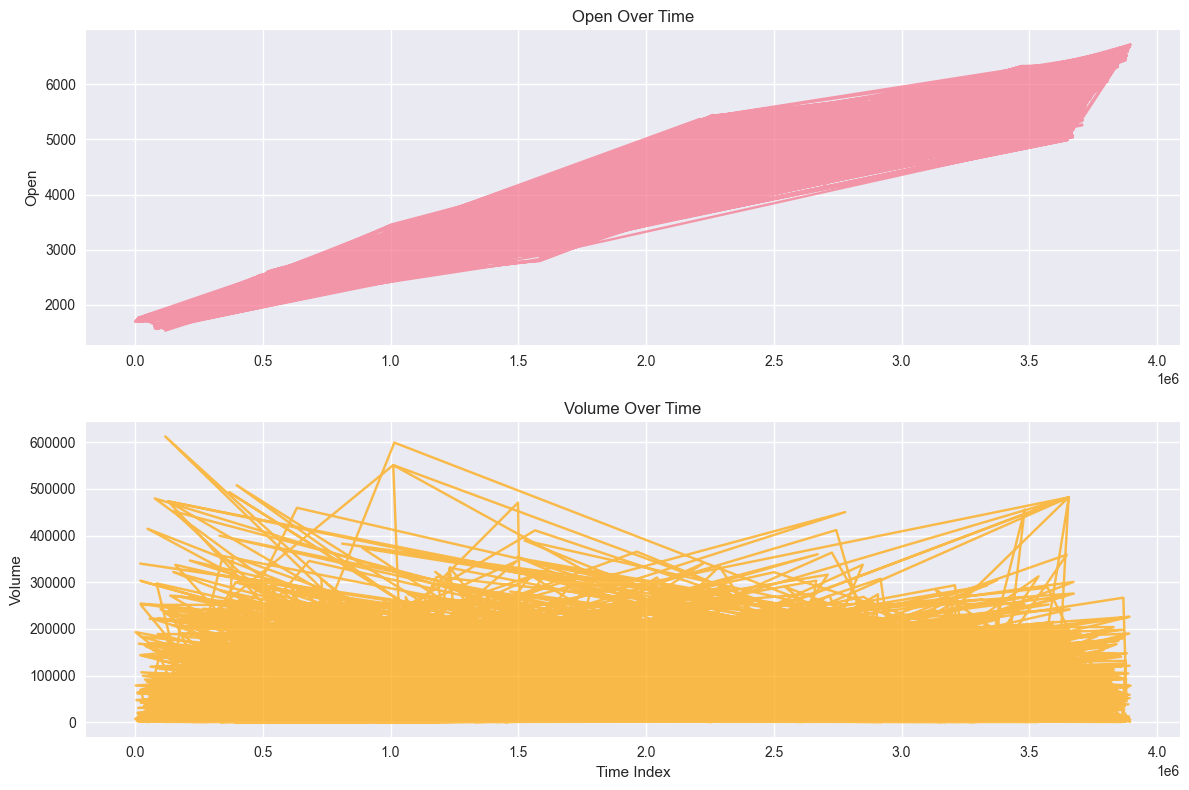

✅ Interactive time series plot created successfully

📝 Volume by Price visualization section completed
   If plots are not interactive, this may be due to missing dependencies
   or Jupyter kernel configuration issues.


In [11]:
# Volume by Price specific analysis and visualizations
if df is not None:
    # Try to identify price and volume columns (common names)
    price_cols = [col for col in df.columns if any(keyword in col.lower() 
                  for keyword in ['price', 'close', 'open', 'high', 'low'])]
    volume_cols = [col for col in df.columns if any(keyword in col.lower() 
                   for keyword in ['volume', 'vol', 'quantity', 'size'])]
    time_cols = [col for col in df.columns if any(keyword in col.lower() 
                 for keyword in ['time', 'date', 'timestamp', 'datetime'])]
    
    print("=== IDENTIFIED COLUMNS ===")
    print(f"Price-related columns: {price_cols}")
    print(f"Volume-related columns: {volume_cols}")
    print(f"Time-related columns: {time_cols}")
    
    # Create price-volume scatter plot if both exist
    if price_cols and volume_cols:
        price_col = price_cols[0]
        volume_col = volume_cols[0]
        
        # Sample for performance
        sample_size = min(5000, len(df))
        df_sample = df.sample(n=sample_size) if len(df) > sample_size else df
        
        # Price-Volume scatter plot with error handling
        try:
            fig = px.scatter(df_sample, x=price_col, y=volume_col,
                            title=f'Price vs Volume Relationship',
                            labels={'x': price_col, 'y': volume_col})
            fig.show()
            print("✅ Interactive scatter plot created successfully")
        except Exception as e:
            print(f"⚠️ Interactive plot failed: {e}")
            print("📝 Creating static plot instead...")
            
            # Fallback to matplotlib
            plt.figure(figsize=(10, 6))
            plt.scatter(df_sample[price_col], df_sample[volume_col], alpha=0.6)
            plt.xlabel(price_col)
            plt.ylabel(volume_col)
            plt.title(f'Price vs Volume Relationship')
            plt.grid(True, alpha=0.3)
            plt.show()
            print("✅ Static scatter plot created successfully")
        
        # Volume profile (if applicable)
        plt.figure(figsize=(12, 8))
        plt.subplot(2, 1, 1)
        plt.plot(df_sample[price_col], alpha=0.7)
        plt.title(f'{price_col} Over Time')
        plt.ylabel(price_col)
        
        plt.subplot(2, 1, 2)
        plt.plot(df_sample[volume_col], alpha=0.7, color='orange')
        plt.title(f'{volume_col} Over Time')
        plt.ylabel(volume_col)
        plt.xlabel('Time Index')
        
        plt.tight_layout()
        plt.show()
    
    # Time series analysis if time column exists
    if time_cols and price_cols:
        time_col = time_cols[0]
        price_col = price_cols[0]
        
        # Try to convert time column to datetime
        try:
            df_time = df.copy()
            df_time[time_col] = pd.to_datetime(df_time[time_col])
            df_time = df_time.sort_values(time_col)
            
            # Sample for performance
            sample_size = min(5000, len(df_time))
            df_sample = df_time.sample(n=sample_size) if len(df_time) > sample_size else df_time
            
            # Try interactive plot first, fallback to static
            try:
                fig = px.line(df_sample, x=time_col, y=price_col,
                             title=f'{price_col} Time Series')
                fig.show()
                print("✅ Interactive time series plot created successfully")
            except Exception as e:
                print(f"⚠️ Interactive time series plot failed: {e}")
                print("📝 Creating static time series plot instead...")
                
                # Fallback to matplotlib
                plt.figure(figsize=(12, 6))
                plt.plot(df_sample[time_col], df_sample[price_col])
                plt.xlabel(time_col)
                plt.ylabel(price_col)
                plt.title(f'{price_col} Time Series')
                plt.xticks(rotation=45)
                plt.grid(True, alpha=0.3)
                plt.tight_layout()
                plt.show()
                print("✅ Static time series plot created successfully")
                
        except Exception as e:
            print(f"Could not create time series plot: {e}")
    
    print("\n" + "="*50)
    print("📝 Volume by Price visualization section completed")
    print("   If plots are not interactive, this may be due to missing dependencies")
    print("   or Jupyter kernel configuration issues.")
    print("="*50)

## 7. Correlation Analysis

=== CORRELATION ANALYSIS ===
Correlation Matrix:
Correlation Matrix:


,Open,High,Low,Close,Volume,RVOL,LTMaxVol,LTTotalVol,LTBidVol,LTAskVol,Price,BidVol,AskVol,TotalVolume,NumOfTrades
Open,1.000000,0.999963,0.999972,0.999955,-0.053895,-0.024170,0.007797,-0.142283,-0.132224,-0.140235,0.999976,-0.285689,-0.286362,-0.292238,-0.086075
High,0.999963,1.000000,0.999931,0.999970,-0.050904,-0.023193,0.009651,-0.140848,-0.131092,-0.138605,0.999971,-0.285879,-0.286462,-0.292387,-0.085987
Low,0.999972,0.999931,1.000000,0.999969,-0.056924,-0.025871,0.005770,-0.143707,-0.133836,-0.141330,0.999974,-0.285667,-0.286243,-0.292166,-0.086316
Close,0.999955,0.999970,0.999969,1.000000,-0.054010,-0.024727,0.007608,-0.142230,-0.132519,-0.139815,0.999976,-0.285825,-0.286321,-0.292287,-0.086158
Volume,-0.053895,-0.050904,-0.056924,-0.054010,1.000000,0.130549,0.447513,0.502499,0.478386,0.483058,-0.053963,0.395708,0.393740,0.403312,0.472487
RVOL,-0.024170,-0.023193,-0.025871,-0.024727,0.130549,1.000000,0.148023,0.121074,0.124713,0.106282,-0.024548,-0.009671,-0.012863,-0.011511,-0.021630
LTMaxVol,0.007797,0.009651,0.005770,0.007608,0.447513,0.148023,1.000000,0.596836,0.599592,0.540157,0.007655,0.157822,0.154191,0.159398,0.219837
LTTotalVol,-0.142283,-0.140848,-0.143707,-0.142230,0.502499,0.121074,0.596836,1.000000,0.959410,0.953399,-0.142329,0.234896,0.231103,0.238063,0.207496
LTBidVol,-0.132224,-0.131092,-0.133836,-0.132519,0.478386,0.124713,0.599592,0.959410,1.000000,0.829614,-0.132515,0.224035,0.212379,0.222963,0.193908
LTAskVol,-0.140235,-0.138605,-0.141330,-0.139815,0.483058,0.106282,0.540157,0.953399,0.829614,1.000000,-0.140015,0.225369,0.230329,0.232787,0.203352


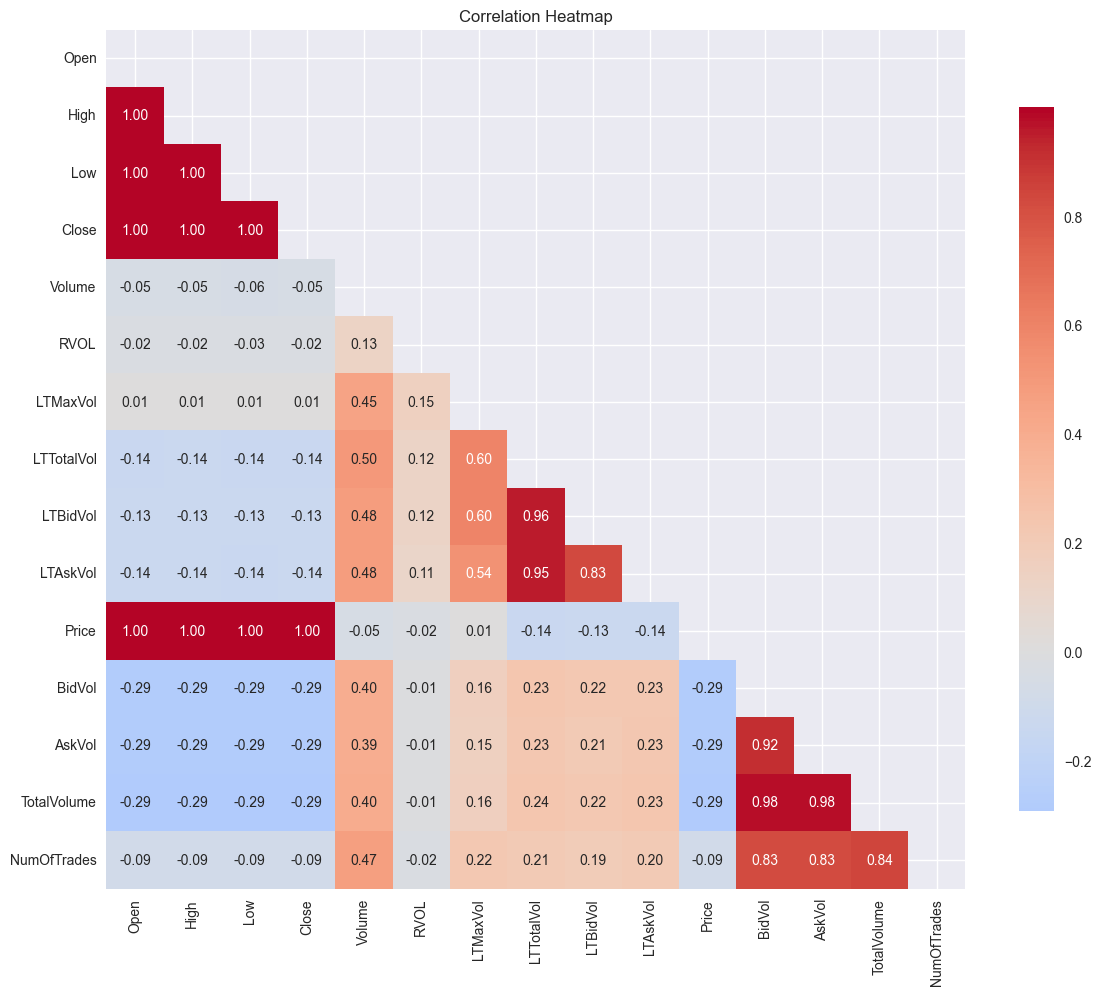


=== HIGH CORRELATIONS (>0.7 or <-0.7) ===


,Variable 1,Variable 2,Correlation
9,Close,Price,0.999976
3,Open,Price,0.999976
8,Low,Price,0.999974
1,Open,Low,0.999972
6,High,Price,0.999971
5,High,Close,0.999970
7,Low,Close,0.999969
0,Open,High,0.999963
2,Open,Close,0.999955
4,High,Low,0.999931


✅ Interactive correlation heatmap created successfully

📝 Correlation analysis completed
   Static heatmap shows all correlation relationships clearly.


In [12]:
# Correlation analysis between numerical variables
if df is not None:
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    
    if len(numerical_cols) > 1:
        print("=== CORRELATION ANALYSIS ===")
        
        # Calculate correlation matrix
        correlation_matrix = df[numerical_cols].corr()
        
        # Display correlation matrix with HTML formatting
        print("Correlation Matrix:")
        html = correlation_matrix.to_html(max_cols=None)
        display(HTML(f'<div style="overflow-x:auto">{html}</div>'))
        
        # Heatmap visualization
        plt.figure(figsize=(12, 10))
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
        sns.heatmap(correlation_matrix, 
                    mask=mask,
                    annot=True, 
                    cmap='coolwarm', 
                    center=0,
                    fmt='.2f',
                    square=True,
                    cbar_kws={"shrink": .8})
        plt.title('Correlation Heatmap')
        plt.tight_layout()
        plt.show()
        
        # Find high correlations
        print("\n=== HIGH CORRELATIONS (>0.7 or <-0.7) ===")
        high_corr_pairs = []
        for i in range(len(correlation_matrix.columns)):
            for j in range(i+1, len(correlation_matrix.columns)):
                corr_val = correlation_matrix.iloc[i, j]
                if abs(corr_val) > 0.7:
                    high_corr_pairs.append({
                        'Variable 1': correlation_matrix.columns[i],
                        'Variable 2': correlation_matrix.columns[j],
                        'Correlation': corr_val
                    })
        
        if high_corr_pairs:
            high_corr_df = pd.DataFrame(high_corr_pairs)
            high_corr_df = high_corr_df.sort_values('Correlation', key=abs, ascending=False)
            html = high_corr_df.to_html(max_cols=None)
            display(HTML(f'<div style="overflow-x:auto">{html}</div>'))
        else:
            print("No high correlations found (threshold: 0.7)")
        
        # Interactive correlation heatmap with error handling
        try:
            fig = px.imshow(correlation_matrix, 
                           text_auto=True, 
                           aspect="auto",
                           color_continuous_scale='RdBu_r',
                           title="Interactive Correlation Heatmap")
            fig.show()
            print("✅ Interactive correlation heatmap created successfully")
        except Exception as e:
            print(f"⚠️ Interactive correlation heatmap failed: {e}")
            print("📝 Static correlation heatmap was already created above with matplotlib/seaborn")
            print("   The matplotlib heatmap provides the same correlation information.")
        
        print("\n" + "="*50)
        print("📝 Correlation analysis completed")
        print("   Static heatmap shows all correlation relationships clearly.")
        print("="*50)
        
    else:
        print("Not enough numerical columns for correlation analysis")

## 8. Outlier Detection

=== OUTLIER DETECTION ===



,Column,IQR_Outliers,IQR_Percentage,ZScore_Outliers,ZScore_Percentage,Lower_Bound,Upper_Bound
0,Open,0,0.000000,0,0.000000,-37.37500,8117.62500
1,High,0,0.000000,0,0.000000,-28.50000,8123.50000
2,Low,0,0.000000,0,0.000000,-52.37500,8112.62500
3,Close,0,0.000000,0,0.000000,-37.46875,8117.28125
4,Volume,143413,3.680350,62191,1.595982,-129884.50000,237039.50000
5,RVOL,287379,7.374891,44726,1.147785,-28.12500,252.31500
6,LTMaxVol,184938,4.745989,58227,1.494256,-286.50000,477.50000
7,LTTotalVol,567370,14.560187,70908,1.819683,-801.00000,1335.00000
8,LTBidVol,594585,15.258594,71253,1.828537,-367.50000,612.50000
9,LTAskVol,595799,15.289749,70514,1.809572,-355.50000,592.50000


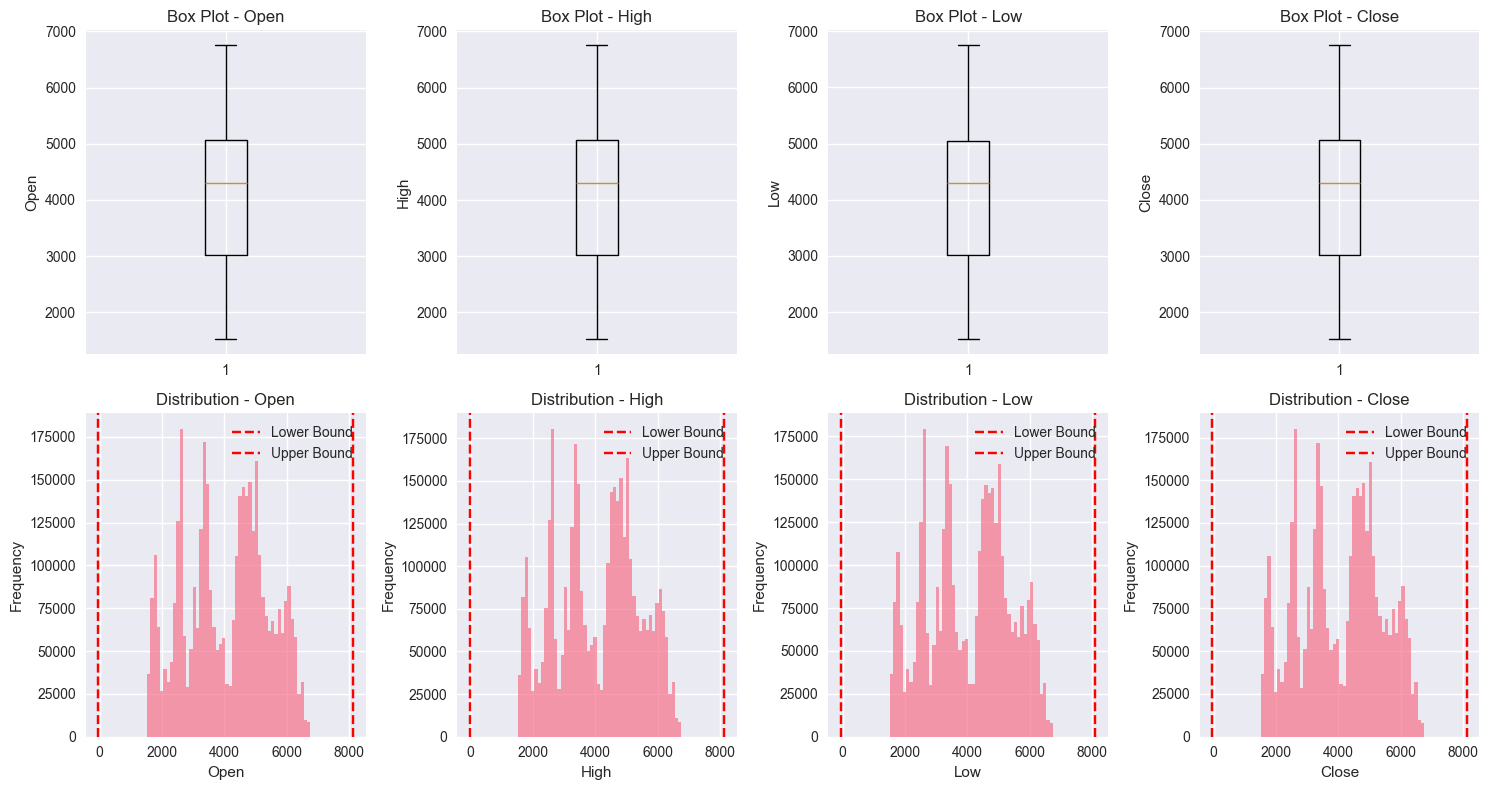


=== EXTREME VALUES SUMMARY ===
\n--- Open ---
Min: 1519.7500
Max: 6755.5000
1st percentile: 1629.2500
99th percentile: 6474.0000
\n--- High ---
Min: 1522.5000
Max: 6756.7500
1st percentile: 1631.7500
99th percentile: 6482.2500
\n--- Low ---
Min: 1515.5000
Max: 6751.7500
1st percentile: 1625.7500
99th percentile: 6469.0000
\n--- Close ---
Min: 1519.5000
Max: 6755.7500
1st percentile: 1629.2500
99th percentile: 6474.5000
\n--- Volume ---
Min: 1.0000
Max: 712858.0000
1st percentile: 1114.0000
99th percentile: 324145.0000
1st percentile: 1625.7500
99th percentile: 6469.0000
\n--- Close ---
Min: 1519.5000
Max: 6755.7500
1st percentile: 1629.2500
99th percentile: 6474.5000
\n--- Volume ---
Min: 1.0000
Max: 712858.0000
1st percentile: 1114.0000
99th percentile: 324145.0000


In [13]:
# Outlier detection using statistical methods
if df is not None:
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    
    if len(numerical_cols) > 0:
        print("=== OUTLIER DETECTION ===")
        
        outlier_summary = []
        
        for col in numerical_cols:
            # IQR method
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            
            # Z-score method (outliers with |z-score| > 3)
            z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
            outliers_zscore = df[z_scores > 3]
            
            outlier_summary.append({
                'Column': col,
                'IQR_Outliers': len(outliers_iqr),
                'IQR_Percentage': (len(outliers_iqr) / len(df)) * 100,
                'ZScore_Outliers': len(outliers_zscore),
                'ZScore_Percentage': (len(outliers_zscore) / len(df)) * 100,
                'Lower_Bound': lower_bound,
                'Upper_Bound': upper_bound
            })
        
        outlier_df = pd.DataFrame(outlier_summary)
        html = outlier_df.to_html(max_cols=None)
        display(HTML(f'<div style="overflow-x:auto">{html}</div>'))
        
        # Visualize outliers for first few columns
        cols_to_plot = numerical_cols[:4]
        fig, axes = plt.subplots(2, len(cols_to_plot), figsize=(15, 8))
        
        if len(cols_to_plot) == 1:
            axes = axes.reshape(-1, 1)
        
        for i, col in enumerate(cols_to_plot):
            # Box plot
            axes[0, i].boxplot(df[col].dropna())
            axes[0, i].set_title(f'Box Plot - {col}')
            axes[0, i].set_ylabel(col)
            
            # Histogram with outlier boundaries
            axes[1, i].hist(df[col].dropna(), bins=50, alpha=0.7)
            
            # Add outlier boundaries
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            axes[1, i].axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
            axes[1, i].axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
            axes[1, i].set_title(f'Distribution - {col}')
            axes[1, i].set_xlabel(col)
            axes[1, i].set_ylabel('Frequency')
            axes[1, i].legend()
        
        plt.tight_layout()
        plt.show()
        
        # Summary of extreme values
        print("\n=== EXTREME VALUES SUMMARY ===")
        for col in numerical_cols[:5]:  # Show first 5 columns
            print(f"\\n--- {col} ---")
            print(f"Min: {df[col].min():.4f}")
            print(f"Max: {df[col].max():.4f}")
            print(f"1st percentile: {df[col].quantile(0.01):.4f}")
            print(f"99th percentile: {df[col].quantile(0.99):.4f}")
    else:
        print("No numerical columns found for outlier detection")

## 9. Feature Distribution Analysis

=== FEATURE DISTRIBUTION ANALYSIS ===


,Feature,Skewness,Skew_Interpretation,Kurtosis,Kurtosis_Interpretation,Zeros_Count,Zeros_Percentage
0,Open,-0.090603,Approximately Normal,-1.045549,Light Tailed,0,0.000000
1,High,-0.092337,Approximately Normal,-1.046791,Light Tailed,0,0.000000
2,Low,-0.088836,Approximately Normal,-1.044727,Light Tailed,0,0.000000
3,Close,-0.090644,Approximately Normal,-1.045639,Light Tailed,0,0.000000
4,Volume,1.836942,Right Skewed,4.593955,Heavy Tailed,0,0.000000
5,RVOL,15.189194,Right Skewed,523.844193,Heavy Tailed,67,0.001719
6,LTMaxVol,4.429629,Right Skewed,41.220471,Heavy Tailed,2057837,52.809438
7,LTTotalVol,7.755223,Right Skewed,98.546242,Heavy Tailed,2057837,52.809438
8,LTBidVol,7.791334,Right Skewed,97.919516,Heavy Tailed,2408688,61.813186
9,LTAskVol,8.108014,Right Skewed,108.911448,Heavy Tailed,2415311,61.983149


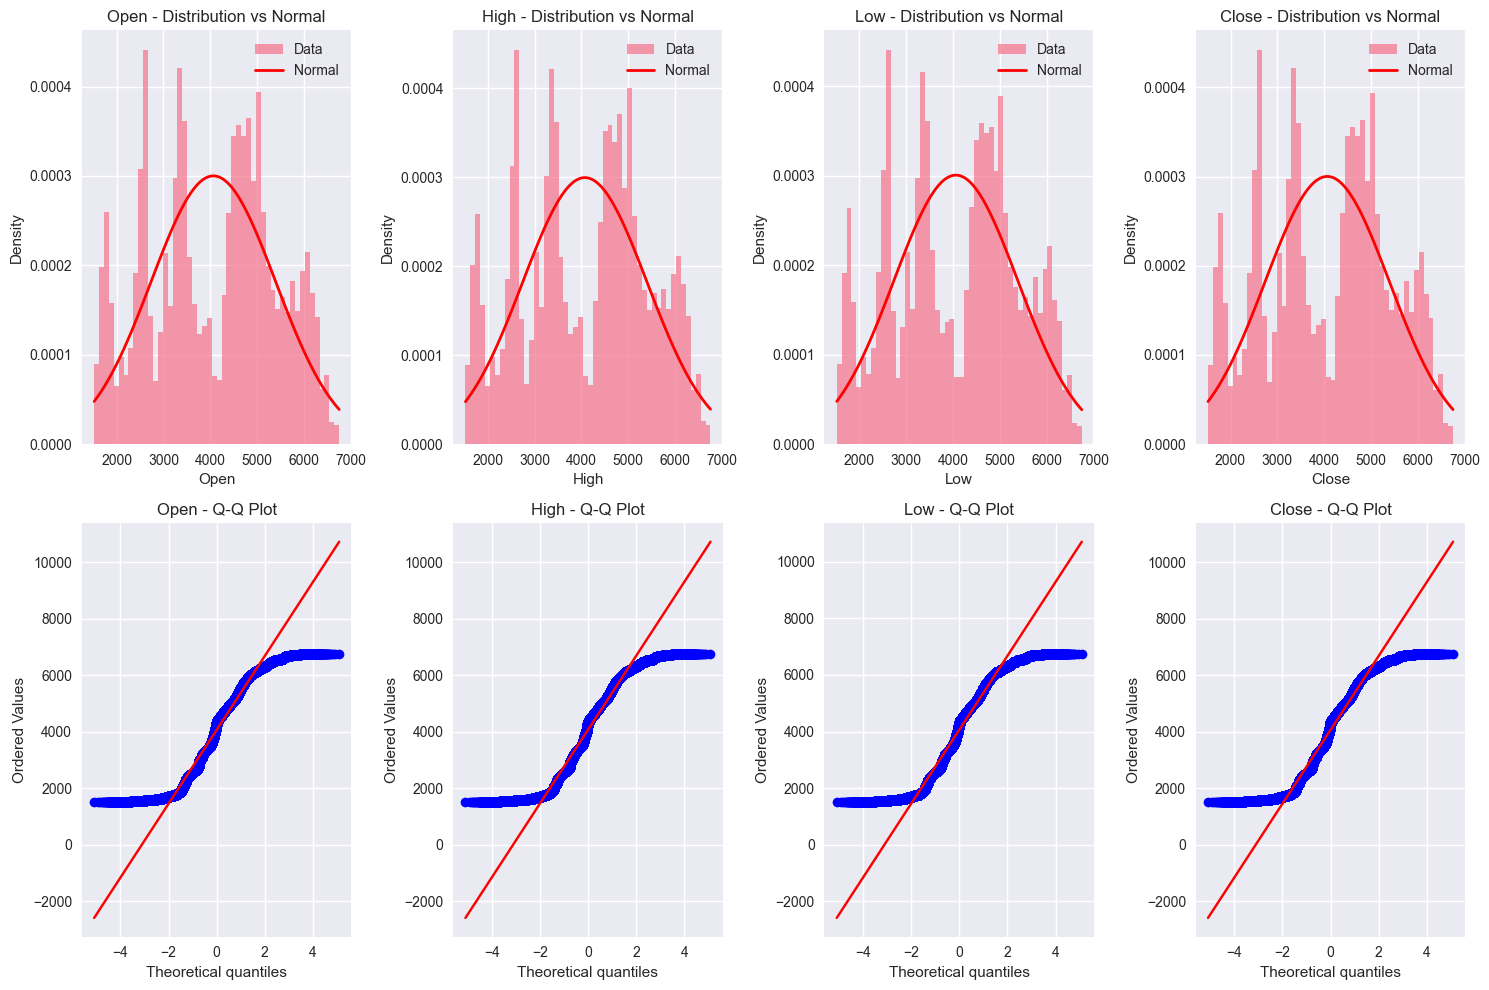

\n=== FEATURE UNIQUENESS ANALYSIS ===


,Feature,Unique_Values,Unique_Ratio,Data_Type,Memory_Usage_MB
0,Open,19694,0.005054,float64,29.729755
1,High,19643,0.005041,float64,29.729755
2,Low,19723,0.005061,float64,29.729755
3,Close,19741,0.005066,float64,29.729755
4,Volume,68309,0.017530,float64,29.729755
5,RVOL,28514,0.007317,float64,29.729755
6,LTMaxVol,1193,0.000306,float64,29.729755
7,LTTotalVol,7463,0.001915,float64,29.729755
8,LTBidVol,4997,0.001282,float64,29.729755
9,LTAskVol,4868,0.001249,float64,29.729755


In [14]:
# Advanced feature distribution analysis
if df is not None:
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    
    if len(numerical_cols) > 0:
        print("=== FEATURE DISTRIBUTION ANALYSIS ===")
        
        # Distribution shapes analysis
        distribution_stats = []
        
        for col in numerical_cols:
            skewness = df[col].skew()
            kurtosis = df[col].kurtosis()
            
            # Classify distribution shape
            if abs(skewness) < 0.5:
                skew_interpretation = "Approximately Normal"
            elif skewness > 0.5:
                skew_interpretation = "Right Skewed"
            else:
                skew_interpretation = "Left Skewed"
            
            if kurtosis > 3:
                kurt_interpretation = "Heavy Tailed"
            elif kurtosis < -1:
                kurt_interpretation = "Light Tailed"
            else:
                kurt_interpretation = "Normal Tails"
            
            distribution_stats.append({
                'Feature': col,
                'Skewness': skewness,
                'Skew_Interpretation': skew_interpretation,
                'Kurtosis': kurtosis,
                'Kurtosis_Interpretation': kurt_interpretation,
                'Zeros_Count': (df[col] == 0).sum(),
                'Zeros_Percentage': ((df[col] == 0).sum() / len(df)) * 100
            })
        
        distribution_df = pd.DataFrame(distribution_stats)
        html = distribution_df.to_html(max_cols=None)
        display(HTML(f'<div style="overflow-x:auto">{html}</div>'))
        
        # Detailed distribution plots with normal overlay
        cols_to_analyze = numerical_cols[:4]  # First 4 columns
        
        fig, axes = plt.subplots(2, len(cols_to_analyze), figsize=(15, 10))
        if len(cols_to_analyze) == 1:
            axes = axes.reshape(-1, 1)
        
        for i, col in enumerate(cols_to_analyze):
            # Histogram with KDE
            axes[0, i].hist(df[col].dropna(), bins=50, density=True, alpha=0.7, label='Data')
            
            # Overlay normal distribution
            mu, sigma = df[col].mean(), df[col].std()
            x = np.linspace(df[col].min(), df[col].max(), 100)
            normal_curve = ((1 / (sigma * np.sqrt(2 * np.pi))) * 
                           np.exp(-0.5 * ((x - mu) / sigma) ** 2))
            axes[0, i].plot(x, normal_curve, 'r-', label='Normal', linewidth=2)
            
            axes[0, i].set_title(f'{col} - Distribution vs Normal')
            axes[0, i].set_xlabel(col)
            axes[0, i].set_ylabel('Density')
            axes[0, i].legend()
            
            # Q-Q plot
            from scipy import stats
            stats.probplot(df[col].dropna(), dist="norm", plot=axes[1, i])
            axes[1, i].set_title(f'{col} - Q-Q Plot')
        
        plt.tight_layout()
        plt.show()
        
        # Feature value ranges and uniqueness
        print("\\n=== FEATURE UNIQUENESS ANALYSIS ===")
        uniqueness_stats = []
        
        for col in numerical_cols:
            unique_count = df[col].nunique()
            unique_ratio = unique_count / len(df)
            
            uniqueness_stats.append({
                'Feature': col,
                'Unique_Values': unique_count,
                'Unique_Ratio': unique_ratio,
                'Data_Type': str(df[col].dtype),
                'Memory_Usage_MB': df[col].memory_usage(deep=True) / (1024**2)
            })
        
        uniqueness_df = pd.DataFrame(uniqueness_stats)
        html = uniqueness_df.to_html(max_cols=None)
        display(HTML(f'<div style="overflow-x:auto">{html}</div>'))
        
    else:
        print("No numerical columns found for distribution analysis")

## 10. Key Findings and Recommendations

Based on the exploratory data analysis performed above, this section will summarize the key insights discovered from the volume by price dataset and provide recommendations for next steps in the analysis.

In [15]:
# Generate automated insights summary
if df is not None:
    print("=== AUTOMATED EDA SUMMARY ===")
    print(f"Dataset contains {df.shape[0]:,} rows and {df.shape[1]} columns")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Data quality insights
    missing_percent = (df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100
    print(f"Overall missing data: {missing_percent:.2f}%")
    
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    print(f"Numerical features: {len(numerical_cols)}")
    print(f"Categorical features: {len(categorical_cols)}")
    
    if len(numerical_cols) > 0:
        # Statistical insights
        high_variance_cols = [col for col in numerical_cols if df[col].var() > df[col].mean()]
        skewed_cols = [col for col in numerical_cols if abs(df[col].skew()) > 1]
        
        print(f"\\nHigh variance features (var > mean): {len(high_variance_cols)}")
        print(f"Highly skewed features (|skew| > 1): {len(skewed_cols)}")
        
        # Potential issues identification
        zero_variance_cols = [col for col in numerical_cols if df[col].var() == 0]
        if zero_variance_cols:
            print(f"\\n⚠️  Zero variance features (constant): {zero_variance_cols}")
        
        duplicate_rows = df.duplicated().sum()
        print(f"\\nDuplicate rows: {duplicate_rows:,} ({(duplicate_rows/len(df)*100):.2f}%)")
    
    print("\\n" + "="*50)
    print("✅ EDA Complete! Review the analysis above for insights.")
    print("💡 Next steps:")
    print("   1. Address any data quality issues identified")
    print("   2. Consider feature engineering based on correlations")
    print("   3. Handle outliers if necessary")
    print("   4. Prepare data for modeling or further analysis")
    print("="*50)

=== AUTOMATED EDA SUMMARY ===
Dataset contains 3,896,722 rows and 16 columns
Memory usage: 475.67 MB
Overall missing data: 0.00%
Numerical features: 15
Categorical features: 0
Numerical features: 15
Categorical features: 0
\nHigh variance features (var > mean): 15
Highly skewed features (|skew| > 1): 10
\nHigh variance features (var > mean): 15
Highly skewed features (|skew| > 1): 10
\nDuplicate rows: 0 (0.00%)
\n==================================================
✅ EDA Complete! Review the analysis above for insights.
💡 Next steps:
   1. Address any data quality issues identified
   2. Consider feature engineering based on correlations
   3. Handle outliers if necessary
   4. Prepare data for modeling or further analysis
\nDuplicate rows: 0 (0.00%)
\n==================================================
✅ EDA Complete! Review the analysis above for insights.
💡 Next steps:
   1. Address any data quality issues identified
   2. Consider feature engineering based on correlations
   3. Handle